In [1]:
import numpy as np
import matplotlib.pyplot as plt


Молекула $A$ в ступает в реакцию образования продуктов $B$ и $C$ с константами скорости реакции первого порядка $k_1$ и  $k_2$ соответственно. Таким образом:

$$
	\dfrac{d\left[A\right]}{dt} = -\left(k_1 + k_2\right) \cdot \left[A\right]
$$

следовательно:

$$
	\left[A\right] = \left[A\right]_0 \cdot e^{-\left(k_1 + k_2\right) \cdot t}
$$

где $\left[A\right]_0$ - начальная концентрация $A$. Значения концентрации продуктов (начиная с $0$) увеличиваются в соответствии с соотношением $\left[B\right]/\left[C\right] = k_1/k_2$, в то время как закон сохранения вещества требует соблюдения условия $\left[B\right] + \left[C\right] = \left[A\right]_0 - \left[A\right]$. Таким образом:

$$
	\left[B\right] = \dfrac{k_1}{\left(k_1 + k_2\right)}\left[A\right]_0\left(1 - e^{-\left(k_1+k_2\right)\cdot t}\right)
$$

$$
	\left[C\right] = \dfrac{k_2}{\left(k_1 + k_2\right)}\left[A\right]_0\left(1 - e^{-\left(k_1+k_2\right)\cdot t}\right)
$$

Небходимо реализовать функцию для расчета значений концентрации компонентов $A$, $B$ и $C$ и найти с ее помощью значения концентраций данных веществ для $t \in \left[0, 1\right]$ шагом $0.1\mathrm{c}$. Начальная концентрация реагента $\left[A\right]_0 = 2.0 \space\mathrm{моль/дм^3}$; константы скорости реакций: $k_1 = 300$, $k_2 = 100 \space \mathrm{c^{-1}}$. 

In [2]:
import math

In [3]:
def calculate_conc(
    c0: list[float, float, float],
    k: list[float, float],
    t: float
) -> tuple[float, float, float]:
    a0, b0, c0 = c0
    k1, k2 = k

    a = a0 * math.exp(-(k1 + k2) * t)
    b = k1 / (k1 + k2) * a0 * (1 - math.exp(-(k1 + k2) * t))
    c = k2 / (k1 + k2) * a0 * (1 - math.exp(-(k1 + k2) * t))
    
    return a, b, c

In [4]:
c0 = [2., .0, .0]
k = (3, 1.5)
time = [i / 10 for i in range(11)]

In [5]:
print(f'{"[A]":^11s}{"[B]":^8s}{"[C]":^9s}')
for t in time:
    r = calculate_conc(c0=c0, k=k, t=t)
    for c in r:
        print(f'{c:8.4f}', end=' ')
    print()

    [A]      [B]      [C]   
  2.0000   0.0000   0.0000 
  1.2753   0.4832   0.2416 
  0.8131   0.7912   0.3956 
  0.5185   0.9877   0.4938 
  0.3306   1.1129   0.5565 
  0.2108   1.1928   0.5964 
  0.1344   1.2437   0.6219 
  0.0857   1.2762   0.6381 
  0.0546   1.2969   0.6485 
  0.0348   1.3101   0.6551 
  0.0222   1.3185   0.6593 


In [6]:
res = []
for t in time:
    r = calculate_conc(c0=c0, k=k, t=t)
    res.append(r)

res = np.array(res)

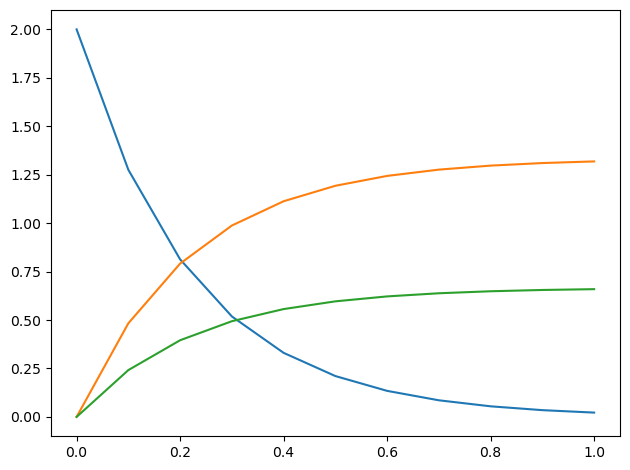

In [7]:
plt.plot(time, res)
plt.tight_layout()


Определение концентрации ионов $\left[H^+\right]$ в растворе с учетом константы диссоциации кислоты $K_a$ и концентрации кислоты $c$ происходит посредством последовательного применения формулы:

$$
	\left[H^+\right]_{n+1} = \sqrt{\left(K_a \cdot \left(c - \left[H^+\right]_n\right)\right)}
$$

при начальном значении $\left[H^+\right]_n = 0.0$. Итерации продолжаются до тех пор, пока изменение значения $\left[H^+\right]$ не  станет меньше, чем некоторая предварительно заданная малая пороговая величина допустимого отклонения. Величину допустимого отклонения принять $\varepsilon = 1.0E\text{-}10$.

|Название|Формула|$pK_a$|
|-|-|-|
|Азотистая|$HNO_2$|$3.35$|
|Уксусная|$CH_3COOH$|$4.76$|
|Угольная|$H_2CO_3$|$6.37$|
|Сероводородная|$H_2S$|$6.92$|
|Хлорноватистая|$HClO$|$7.25$|
|Бромноватистая|$HBrO$|$8.7$|
|Ортотеллуровая|$H_6TeO_6$|$8.8$|

 $pH$ раствора ($pH = -\lg\left[H^+\right]$); $pK_a = -\lg\left(K_a\right)$. Концентрацию кислоты принять $c = 0.01 \space\mathrm{M}$. 

Составьте функцию для расчета pH кислоты. Используя данную функцию, рассчитайте:
1. Зависимость pH от концентрации азотистой кислоты при значениях $c \in \left[0.01, 0.1\right]$  с шагом $0.01 \space \mathrm{M}$.
2. Зависимость pH от показателя константы диссоциации кислоты при постоянной концентрации $c=0.01 \space \mathrm{M}$. Значения показателей констант диссоциации взять из таблицы.

In [9]:
def calculate_ion_concentration(
        initial_value: float,
        concentration: float,
        ka: float
) -> float:
    return (ka * (concentration - initial_value)) ** .5


def calculate_pH(
        concentration: float, 
        pka: float,
        initial_value: float = .0,
        eps: float = 1e-10
) -> float:
    ka = 10 ** -pka
    value = calculate_ion_concentration(initial_value, concentration, ka)
    
    while abs(value - initial_value) >= eps:
        initial_value = value
        value = calculate_ion_concentration(initial_value, concentration, ka) 
    
    return -math.log10(value) 

In [10]:
# 1. Зависимость pH от концентрации азотистой кислоты

pka = 3.35
conc_list = [c / 100 for c in range(1, 11)]
for c in conc_list:
    pH = calculate_pH(concentration=c, pka=pka)
    print(f'{c:4.2f} {pH:6.4f}')

0.01 2.7208
0.02 2.5569
0.03 2.4629
0.04 2.3969
0.05 2.3460
0.06 2.3047
0.07 2.2698
0.08 2.2397
0.09 2.2132
0.10 2.1895


In [11]:
# 2. Зависимость pH от показателя константы диссоциации кислоты
c = 0.01
pka_list = [3.35, 4.76, 6.37, 6.92, 7.25, 8.7, 8.8]
for pka in pka_list:
    pH = calculate_pH(concentration=c, pka=pka)
    print(f'{pka:4.2f} {pH:6.4f}')

3.35 2.7208
4.76 3.3891
6.37 4.1864
6.92 4.4608
7.25 4.6255
8.70 5.3501
8.80 5.4001
